In [6]:
import pandas as pd
import numpy as np
import re
import re as sub
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [7]:

try:
    with open('corpus_all.txt', 'r', encoding='utf-8') as file:
        lines = []  # Empty list to store the lines
        for line in file:
            lines.append(line.strip())  # Append the line to the list, removing any leading/trailing whitespace
    
    with open('stopwords-bn.txt', 'r', encoding='utf-8') as test:
        stopwords_bn = test.readlines()
        # the above stopwords contains newline \n
        stop_bn = []

        for word in stopwords_bn:
            stop_bn.append(word.rstrip("\r\n"))
            
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

#file_path = 'corpus_all.txt'  # Replace with the actual path to your text file
first_words = []  # Empty list to store the first words

try:
    for line in lines:
        words = line.strip().split()  # Split the line into words
        if words:
            first_word = words[0]  # Get the first word
            first_words.append(first_word)  # Append the first word to the list

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")


# Define the status levels
status_levels = ["happy","angry","fear","disgust","sad","surprise",]

# Initialize a list to store the extracted status levels and sentences
extracted_data = []

# Iterate over the texts
for text in lines:
    # Initialize variables to store the extracted status level and sentence
    status = ""
    sentence = ""

    # Iterate over the status levels
    for level in status_levels:
        if level in text:
            # Split the text based on the status level
            split_text = text.split(level, 1)

            # Extract the status level and sentence
            status = level
            sentence = split_text[1].strip()
            break

    # Append the extracted status level and sentence to the list
    extracted_data.append({"Status": status, "Sentence": sentence})
    
df = pd.DataFrame(extracted_data)
data = df.copy()

In [8]:
df

,Status,Sentence
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...
4,angry,রাতের বেলা আবার কিসের সকাল।
...,...,...
6284,surprise,ভারতে প্রতিদিন ১৮ টা রেপ কেইস এন্ট্রি হয়
6285,surprise,এই কি স্বাধীন দেশ
6286,sad,স্বাধীন দেশের নাগরিক হয়ে ও আজ আমরা পরাধীন।
6287,angry,চুদলাম দাদা পয়সা নাই


<Axes: >

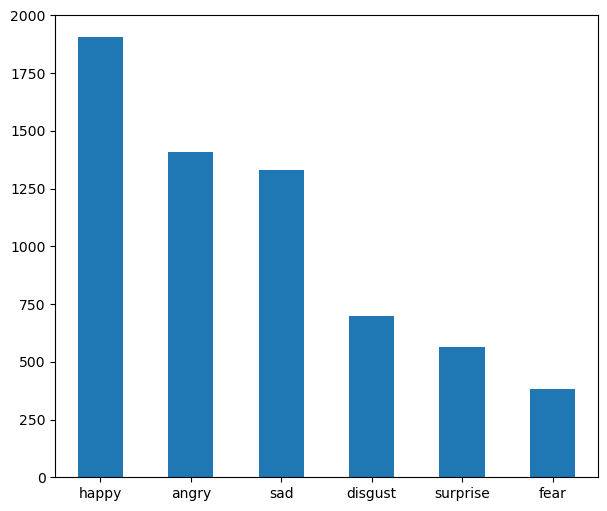

In [9]:

# Plot the distribution of the target variable
df['Status'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)

In [10]:
# data cleaning
# Remove the stopwords and set new df data
data['Sentence'] = data['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_bn)]))


# Remove the punctuation marks
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]', '')

# Remove the numbers
data['Sentence'] = data['Sentence'].str.replace('\d+', '')

# Remove the extra spaces
data['Sentence'] = data['Sentence'].str.replace(' +', ' ')

data

C:\Users\Pinash\AppData\Local\Temp\ipykernel_7648\1875665039.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Sentence'] = data['Sentence'].str.replace('[^\w\s]', '')
C:\Users\Pinash\AppData\Local\Temp\ipykernel_7648\1875665039.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Sentence'] = data['Sentence'].str.replace('\d+', '')
C:\Users\Pinash\AppData\Local\Temp\ipykernel_7648\1875665039.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Sentence'] = data['Sentence'].str.replace(' +', ' ')


,Status,Sentence
0,sad,বরবর মননয পরধনমনতর গণপরজতনতর বলদশ সরকর মননয পর...
1,sad,তদনত লভ তদনতর হয়ছ মন রজনতক শকতর তদনত পরব সমনয ...
2,angry,দশক মধযম আয়র দশ রপনতর মগর মলকর দশ পরনত হচছ
3,happy,গরবত মসলম সগরম যদধ চর রণবর আললহ ছর নচ শর নরয় ত...
4,angry,রতর বল কসর সকল
...,...,...
6284,surprise,ভরত পরতদন ট রপ কইস এনটর
6285,surprise,সবধন দশ
6286,sad,সবধন দশর নগরক হয় পরধন
6287,angry,চদলম দদ পয়স


In [11]:
X = data['Sentence']
y = data['Status']

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming 'X_train' contains your text sentences and 'y_train' contains labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Reshape y_train to be a 1D array
y_train = y_train.ravel()

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

In [30]:
X_train_resampled, y_train_resampled

(<9084x11186 sparse matrix of type '<class 'numpy.float64'>'
 	with 91537 stored elements in Compressed Sparse Row format>,
 array(['happy', 'disgust', 'sad', ..., 'surprise', 'surprise', 'surprise'],
       dtype=object))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [75]:
X_train, y_train

(<7267x11186 sparse matrix of type '<class 'numpy.float64'>'
 	with 74491 stored elements in Compressed Sparse Row format>,
 array(['surprise', 'disgust', 'happy', ..., 'angry', 'happy', 'fear'],
       dtype=object))

In [69]:
# Import the MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB

# Instantiate the MultinomialNB classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = nb_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.693450742982939


In [68]:
# Import the SGDClassifier
from sklearn.linear_model import SGDClassifier

# Instantiate the SGDClassifier
sgd_classifier = SGDClassifier()

# Fit the classifier to the training data
sgd_classifier.fit(X_train, y_train)
# Create the predicted tags
predictions = sgd_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.7490368739680793


In [70]:
# Import the LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression
logreg_classifier = LogisticRegression()

# Fit the classifier to the training data
logreg_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = logreg_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.7143643368189323


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
# Import the LinearSVC
from sklearn.svm import LinearSVC

# Instantiate the LinearSVC
linsvc_classifier = LinearSVC()

# Fit the classifier to the training data
linsvc_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = linsvc_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.7837094111172263


In [73]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = rf_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.8084755090809026


In [74]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = dt_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.7732526141992295


In [75]:
# Import the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = knn_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.6224545954870666


In [76]:
# Import the AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the AdaBoostClassifier
ada_classifier = AdaBoostClassifier()

# Fit the classifier to the training data
ada_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = ada_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.30324711062190424


In [77]:
# Import the GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier to the training data
gb_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = gb_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.5294441386901486


In [79]:
# Import the BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate the BaggingClassifier
bag_classifier = BaggingClassifier()

# Fit the classifier to the training data
bag_classifier.fit(X_train, y_train)

# Create the predicted tags
predictions = bag_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, predictions)

# Print the score
print(score)

0.7809576224545954


In [33]:
# Apply the CNN model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

# Set the maximum number of words to be embedded
MAX_NB_WORDS = 50000

# Set the maximum length of each sentence
MAX_SEQUENCE_LENGTH = 250

# Set the embedding dimension
EMBEDDING_DIM = 100


In [79]:

X_train_dense = X_train.toarray

from tensorflow.keras.layers import Input

input_layer = Input(shape=(11186,), sparse=True)


In [82]:
input_layer

<KerasTensor: type_spec=SparseTensorSpec(TensorShape([None, 11186]), tf.float32) (created by layer 'input_1')>

In [52]:
from sklearn.preprocessing import LabelEncoder

# X_test, y_test convert to NumPy arrays
X_test_array = np.array(X_train)
y_test_array = np.array(y_test)

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform label encoder on training labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded labels to categorical form
y_train_seq = to_categorical(y_train_encoded)
y_test_seq = to_categorical(y_test_encoded)


In [54]:

print("X_test_array shape:", X_test_array.shape)
print("y_test_array shape:", y_test_array.shape)

print("Type of X_train_array:", type(X_train_array))
print("Type of y_train_seq_array:", type(y_train_seq_array))


X_test_array shape: ()
y_test_array shape: (1817,)
Type of X_train_array: <class 'numpy.ndarray'>
Type of y_train_seq_array: <class 'numpy.ndarray'>


In [27]:

# Create the model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 246, 128)          64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 5,064,902
Trainable params: 5,064,902
No

In [51]:
# Fit the model
history = model.fit(X_train, y_train_seq_array, epochs=3, batch_size=64, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)])

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'scipy.sparse._csr.csr_matrix'>]

In [ ]:
# Create the predicted tags 